<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="380" alt="Skills Network Logo">
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

<ipython-input-2-71225e3ad40e>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Load the dataset into a dataframe.


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:


In [3]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [4]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"

To obtain the dataset, utilize the download() function as defined above:  


In [5]:
await download(file_path, "m2_survey_data.csv")
file_name="m2_survey_data.csv"

Utilize the Pandas method read_csv() to load the data into a dataframe.


In [21]:
df = pd.read_csv(file_name)

> Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface.While working on the downloaded version of this notebook on their local machines(Jupyter Anaconda), the learners can simply **skip the steps above,** and simply use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


In [ ]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


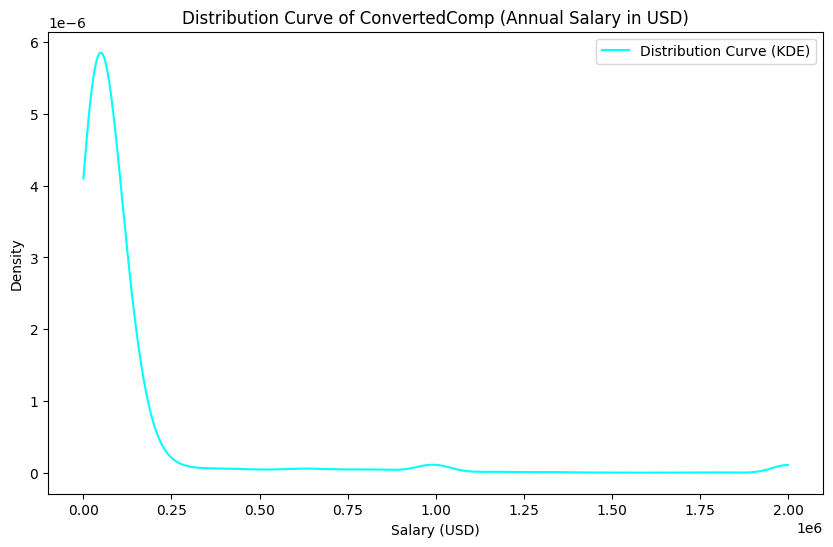

In [22]:
# use scipy to compute the KDE-Kernel Density Estimate
from scipy.stats import gaussian_kde

# Remove missing or NaN values from the ConvertedComp column
df = df[df['ConvertedComp'].notna()]

# Create the KDE (distribution curve)
kde = gaussian_kde(df['ConvertedComp'])

# Generate values for the x-axis (range of salary)
x_vals = range(int(df['ConvertedComp'].min()), int(df['ConvertedComp'].max()), 1000)

# Plot the distribution curve
plt.figure(figsize=(10, 6))
plt.plot(x_vals, kde(x_vals), color='cyan', label='Distribution Curve (KDE)')
plt.title('Distribution Curve of ConvertedComp (Annual Salary in USD)')
plt.xlabel('Salary (USD)')
plt.ylabel('Density')
plt.legend()
plt.show()



Plot the histogram for the column `ConvertedComp`.


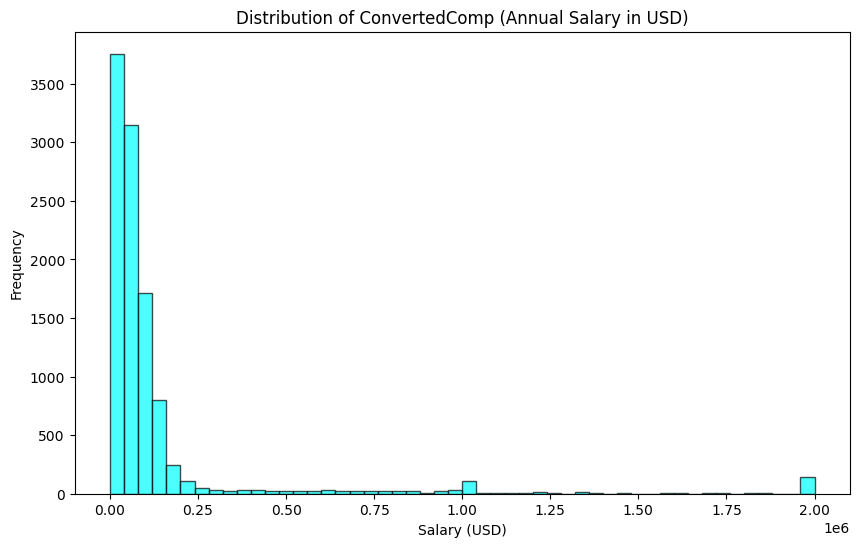

In [23]:
# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['ConvertedComp'], bins=50, color='cyan', edgecolor='black', alpha=0.7)

# labels and title
plt.title('Distribution of ConvertedComp (Annual Salary in USD)')
plt.xlabel('Salary (USD)')
plt.ylabel('Frequency')

#show plot
plt.show()

What is the median of the column `ConvertedComp`?


In [24]:
# Calculate the median
median_converted_comp = df['ConvertedComp'].median()
median_converted_comp

57745.0

How many responders identified themselves only as a **Man**?


In [25]:
# Filter the data for respondents who identified as 'Man'
man_count = df[df['Gender'] == 'Man'].shape[0]
print(f"Number of responders as Man: {man_count}")

Number of responders as Man: 9725


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [26]:
# Filter the data for respondents who identified as 'Woman'
woman_count = df[df['Gender'] == 'Woman']['ConvertedComp'].median()
print(f"Number of responders as Woman: {woman_count}")

Number of responders as Woman: 57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [27]:
# Remove any missing values from the Age column
df = df[df['Age'].notna()]

# your code goes here
five_number_summary = {
    'Minimum': df['Age'].min(),
    'Q1': df['Age'].quantile(0.25),
    'Median': df['Age'].median(),
    'Q3': df['Age'].quantile(0.75),
    'Maximum': df['Age'].max()
}

# Five Number Summary for Age
for key, value in five_number_summary.items():
    print(f"{key}: {value}")

Minimum: 16.0
Q1: 25.0
Median: 29.0
Q3: 35.0
Maximum: 99.0


Plot a histogram of the column `Age`.


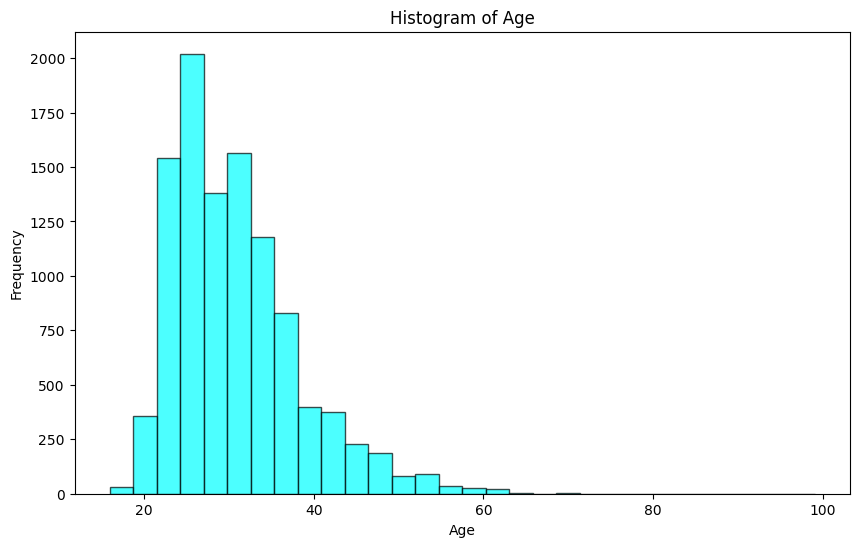

In [28]:
# Plot the histogram for the Age column
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=30, color='cyan', edgecolor='black', alpha=0.7)

# Add labels and title
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Show the plot
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


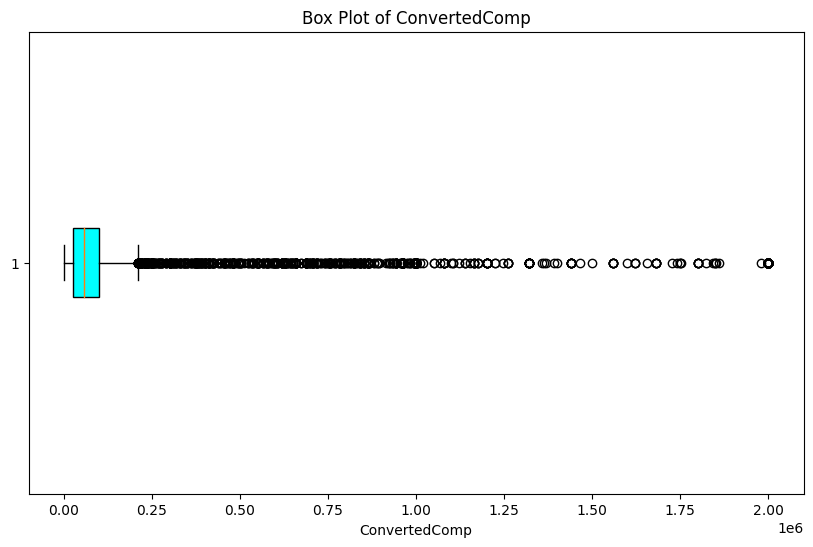

In [29]:
# Remove any missing values from the ConvertedComp column
df = df[df['ConvertedComp'].notna()]

# Create a box plot for the ConvertedComp column
plt.figure(figsize=(10, 6))
plt.boxplot(df['ConvertedComp'], vert=False, patch_artist=True, boxprops=dict(facecolor='cyan'))

# Add labels and title
plt.title('Box Plot of ConvertedComp')
plt.xlabel('ConvertedComp')

# Show the plot
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [38]:
# import pandas as pd
# # Load your dataset (replace 'your_data.csv' with your actual file path)
# df = pd.read_csv('your_data.csv')

# Calculate Q1 and Q3
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

print(f"The Interquartile Range (IQR) for the ConvertedComp column is: {IQR}")



The Interquartile Range (IQR) for the ConvertedComp column is: 73165.5


Find out the upper and lower bounds.


In [31]:
# Calculate lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"The lower bound is: {lower_bound}")
print(f"The upper bound is: {upper_bound}")

The lower bound is: -82913.75
The upper bound is: 209748.25


Identify how many outliers are there in the `ConvertedComp` column.


In [32]:
# Identify outliers
outliers = df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)]

# Count the number of outliers
num_outliers = outliers.shape[0]

print(f"The number of outliers in the ConvertedComp column is: {num_outliers}")


The number of outliers in the ConvertedComp column is: 861


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [33]:
# Create a new DataFrame by removing outliers
df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]

# Display the new DataFrame's shape to confirm outliers have been removed
print(f"The new DataFrame without outliers has {df_no_outliers.shape[0]} rows.")

# # Create bins for age groups
# bins = [16, 24, 32, 40, 48, 100]  # Define your bins based on the age ranges
# labels = ['16-24', '24-32', '32-40', '40-48', '48-100']  # 5 labels for 5 bins

# # Create a new column for the age group
# df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# # Count the number of respondents in each age group
# age_group_counts = df['AgeGroup'].value_counts()

# # Find the age group with the maximum count
# max_age_group = age_group_counts.idxmax()
# print(f"The age group with the highest number of survey respondents is: {max_age_group}")



The new DataFrame without outliers has 9493 rows.


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [42]:
median_converted_comp_after = df_no_outliers['ConvertedComp'].median()
print(f"Median ConvertedComp after removing outliers: {median_converted_comp_after}")

# # 1st sample
# # Create a new DataFrame by removing outliers
# df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]
# # Remove any missing values from df_no_outliers
# df_no_outliers = df_no_outliers.dropna()
# # Select only numeric columns for correlation
# numeric_df = df_no_outliers.select_dtypes(include=['float64', 'int64'])
# # Calculate correlation matrix for the numeric DataFrame
# correlation_matrix_no_outliers = numeric_df.corr()
# # Extract the correlation of Age with all other numerical columns
# age_correlation_no_outliers = correlation_matrix_no_outliers['Age']
# # Display the correlation values
# print(age_correlation_no_outliers)


# # 2nd sample
# df_numeric = df_no_outliers.select_dtypes(include=['int64', 'float64'])
# # Step 2: Calculate the correlation matrix
# correlation_matrix = df_numeric.corr()
# # Display the correlation matrix
# print(correlation_matrix)
# # Step 3: Extract the correlation of Age with all other numerical columns
# age_correlation = correlation_matrix['Age']
# print("Correlation of Age with other numeric columns:")
# print(age_correlation)
# # Find the column with negative correlation with "Age"
# negative_correlation = age_correlation[age_correlation < 0]
# print("Columns with negative correlation with Age:")
# print(negative_correlation)

Median ConvertedComp after removing outliers: 52356.0


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
